In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Dataset

In [2]:
# membaca dataset 
df = pd.read_csv("hotel_bookings.csv")

In [9]:
df = df.iloc[:2999]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# A. Data Cleaning & Preprocessing 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2999 non-null   object 
 1   is_canceled                     2999 non-null   int64  
 2   lead_time                       2999 non-null   int64  
 3   arrival_date_year               2999 non-null   int64  
 4   arrival_date_month              2999 non-null   object 
 5   arrival_date_week_number        2999 non-null   int64  
 6   arrival_date_day_of_month       2999 non-null   int64  
 7   stays_in_weekend_nights         2999 non-null   int64  
 8   stays_in_week_nights            2999 non-null   int64  
 9   adults                          2999 non-null   int64  
 10  children                        2999 non-null   float64
 11  babies                          2999 non-null   int64  
 12  meal                            29

In [10]:
df.isna().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              1
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              465
company                           2876
days_in_waiting_list     

Terdapat 3 feature yang NAN yaitu country, agent, dan company.

In [27]:
df[df['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15


In [29]:
df['country'].value_counts()

PRT    1774
ESP     343
GBR     316
IRL     143
FRA      79
DEU      38
NLD      35
CN       28
USA      27
BEL      22
CHE      22
POL      19
RUS      18
ITA      15
BRA      13
ROU      12
AUT      10
FIN       8
SWE       7
LVA       6
DNK       5
LUX       4
ARG       4
NOR       4
AUS       3
IND       3
CHN       3
MEX       2
EST       2
DZA       2
LTU       2
CHL       2
MOZ       2
OMN       2
TUR       2
MAR       2
SVN       2
CZE       2
ZWE       1
SRB       1
ZMB       1
GRC       1
PRI       1
CYM       1
ISR       1
UKR       1
AGO       1
SMR       1
ALB       1
ZAF       1
BLR       1
CPV       1
BWA       1
Name: country, dtype: int64

In [52]:
df[(df['reservation_status_date'] == '2015-07-15') & (df['customer_type'] == 'Transient')]['country']

30      NaN
155     PRT
156     PRT
224     GBR
226     PRT
263     POL
264     PRT
265     EST
288     GBR
289     PRT
290     CZE
337     ESP
351     ESP
352     AUS
354     PRT
355     ESP
356     ESP
387     PRT
388     PRT
407     PRT
830     PRT
833     PRT
834     PRT
856     PRT
1237    PRT
1348    PRT
1362    PRT
1717    PRT
1816    PRT
Name: country, dtype: object

Dari value count terbanyak adalah PRT dan dilihat dari pendakatan tanggal reservasi dan tipe customer adalah PRT atau portugal jadi saya akan mengisi data nan country sebagai PRT

In [54]:
df['country'] = df['country'].fillna('PRT')

In [62]:
df['agent'] = df['agent'].fillna(0)

Untuk Mengisi Agent dengan mengganti nan sebagai id baru yaitu 0 dikarenakan ketika kita salah mengisikan agentnya dapat merugikan agent yg lain ataupun agent itu sendiri ketika mereka tidak membooking nya.

In [63]:
# drop company
df = df.drop(['company'], axis = 1)

Saya meng drop company karena 90% datanya adalah NAN sehingga akan menjadikan data tidak representative ketika nanti diisi dengan mean median ataupun diisi dari memperhatikan feature yang lain dan akan menjadi bias ketika dijadikan feature untuk model mechine learning.


# EDA

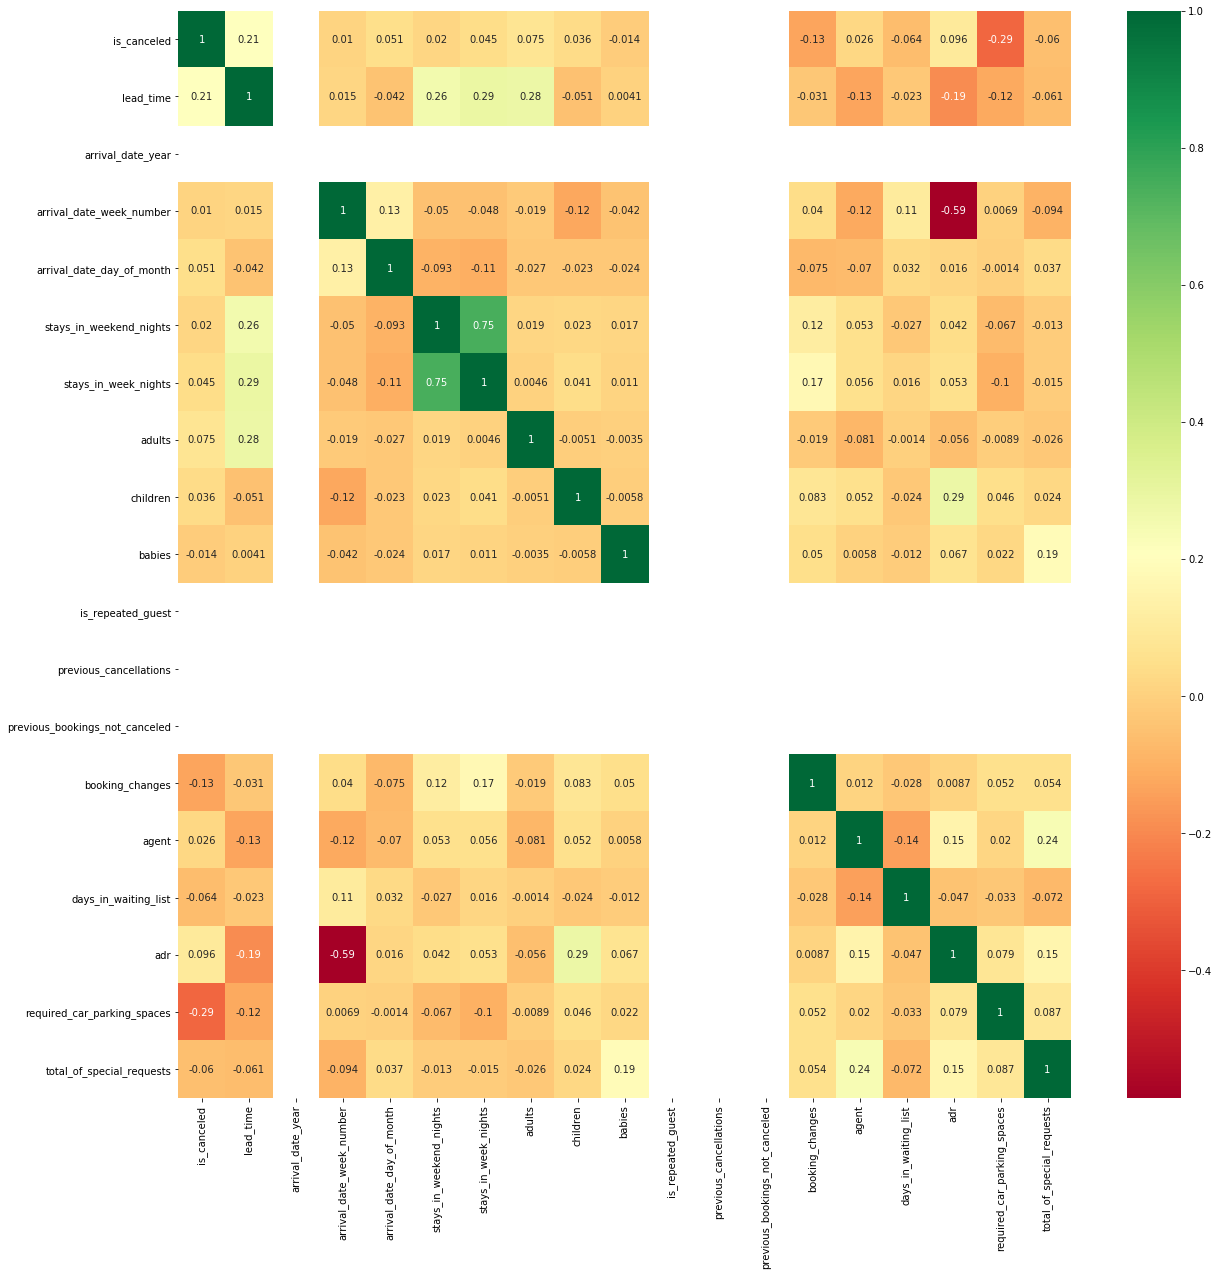

In [71]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [69]:
correlation = df.corr()["is_canceled"]
correlation.abs().sort_values(ascending=False)[1:]

required_car_parking_spaces       0.286929
lead_time                         0.209389
booking_changes                   0.128580
adr                               0.096207
adults                            0.075404
days_in_waiting_list              0.063694
total_of_special_requests         0.059526
arrival_date_day_of_month         0.051144
stays_in_week_nights              0.044800
children                          0.035620
agent                             0.025981
stays_in_weekend_nights           0.019780
babies                            0.014373
arrival_date_week_number          0.010482
arrival_date_year                      NaN
is_repeated_guest                      NaN
previous_cancellations                 NaN
previous_bookings_not_canceled         NaN
Name: is_canceled, dtype: float64

dari heatmap dan dara corr yang terlah diurutkan berdasarkan nilai tertinggi terhadap is canceled memperlihatkan beberapa feature yang memiliki nilai max di 0.286 yaitu required_car_parking_spaces 

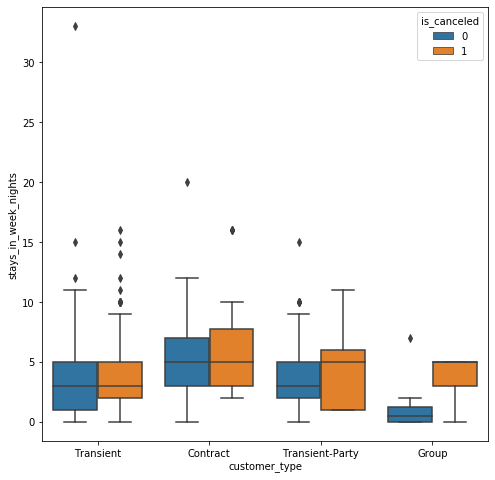

In [88]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'customer_type', y = 'stays_in_week_nights', data = df, hue = "is_canceled")

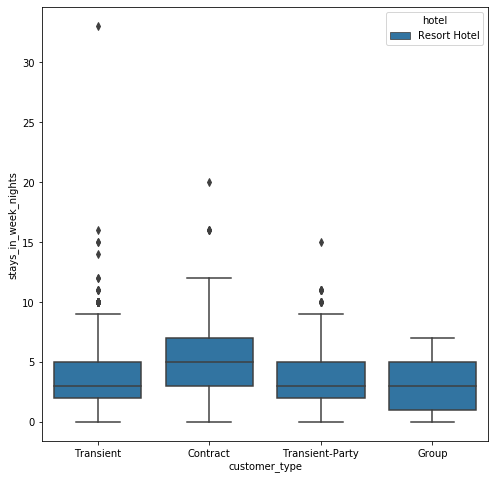

In [89]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'customer_type', y = 'stays_in_week_nights', data = df, hue = "hotel")

dari boxplot diatas dapat dijelaskan bahwa kebanyakan org yang mencancel adalah customer type yang contract berdurasi antara 5 sampai 10 minggu yang berada di resort hotel

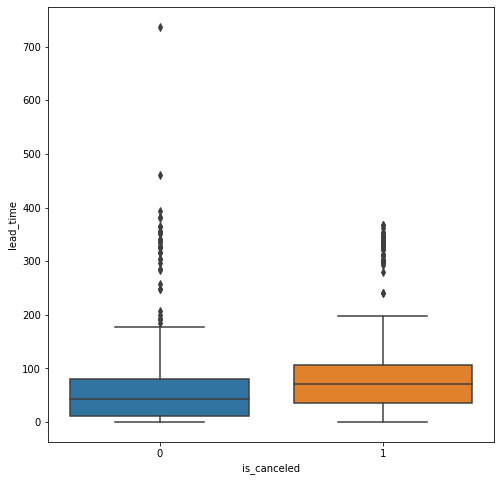

In [79]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'is_canceled', y = 'lead_time', data = df)

banyaknya leadtime tidak memperlihatkan perbedaan dari cancel atau tidak di cancel karena memiliki pola gambar yang tidak jauh berbeda

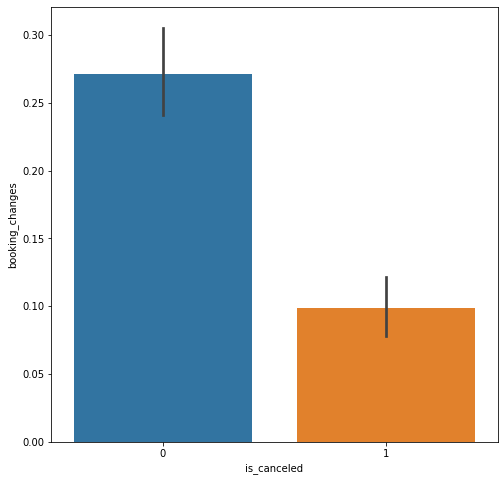

In [91]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'is_canceled', y = 'booking_changes', data = df)

dari boxplot tersebut memperlihatkan bahwa orang yang melakukan banyak reschedulle cenderung untuk tidak mencancel book nya

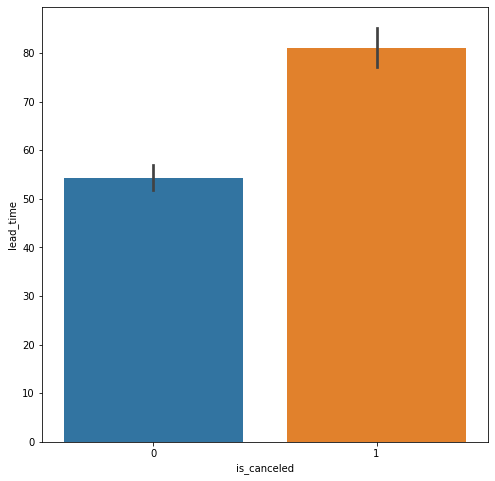

In [95]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'is_canceled', y = 'lead_time', data = df)

orang yang melakukan cancelation cenderung memiliki lead time yang tinggi

# Model Building & Hyper-parameter Tuning

In [97]:
# splitting model

df_baru = df[['required_car_parking_spaces', 'lead_time', 'booking_changes', 'adr', 'adults', 'is_canceled']].copy()
df_baru.head()

,required_car_parking_spaces,lead_time,booking_changes,adr,adults,is_canceled
0,0,342,3,0.0,2,0
1,0,737,4,0.0,2,0
2,0,7,0,75.0,1,0
3,0,13,0,75.0,1,0
4,0,14,0,98.0,2,0


In [100]:
x = df_baru.drop(['is_canceled'], axis=1)
y = df_baru['is_canceled']

### Logistic Regression

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [103]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
# prediksi
y_pred = model.predict(x_test) 

In [106]:
x_test.iloc[:1]

,required_car_parking_spaces,lead_time,booking_changes,adr,adults
2399,0,12,0,50.4,2


In [107]:
# trying to predict using model
coba = x_test.iloc[:1]
model.predict(coba)
# coba

array([0], dtype=int64)

In [108]:
model.score(x_train, y_train)

0.68528553563985

In [109]:
model.score(x_test, y_test)

0.6933333333333334

Dari percobaan diatas yang memiliki features tersebut menghasilkan prediksi 0 model score test 0.69

### Hyper-parameter Tuning Randomized Search CV

In [112]:
# Parameter yang dipakai di model asli
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [113]:
# parameter model logistic regression yang akan dituned + nilai yang mungkin

penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [114]:
# mencari parameter terbaik pada model: logistic regression

from sklearn.model_selection import RandomizedSearchCV
model_LR = LogisticRegression()
model_LR_RS = RandomizedSearchCV(
    estimator = model_LR, param_distributions= param, cv = 5
)

# model_LR2_GS = GridSearchCV( model_LR2, param, cv=5, error_score=0.0)

In [115]:
model_LR_RS.fit(x_train, y_train)
model_LR_RS.best_params_

C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000}

hasil tersebut adalah parameter terbaik dari params yaitu: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000}

In [117]:
model.score(x_test, y_test)

0.6933333333333334

In [122]:
model_LogReg_Baru = LogisticRegression(solver='lbfgs', penalty = 'l2', max_iter = 10000)

model_LogReg_Baru.fit(x_train, y_train)
model_LogReg_Baru.score(x_test, y_test)

0.6933333333333334

### **Grid Search CV**

In [119]:
from sklearn.model_selection import GridSearchCV
model_LR2 = LogisticRegression()
model_LR2_GS = GridSearchCV(
    model_LR2, param, cv = 5
)

In [120]:
model_LR2_GS.fit(x_train, y_train)
model_LR2_GS.best_params_

C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to conv

C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: T

C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. I

C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: T

C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: 

C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\USER\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Deta

{'max_iter': 10000, 'penalty': 'none', 'solver': 'sag'}

hasil tersebut adalah parameter terbaik dari params yaitu: {'max_iter': 10000, 'penalty': 'none', 'solver': 'sag'}

In [121]:
model.score(x_test, y_test)

0.6933333333333334

In [123]:
model_LogReg_Baru_2 = LogisticRegression(solver='sag', penalty = 'none', max_iter = 10000)

model_LogReg_Baru_2.fit(x_train, y_train)
model_LogReg_Baru_2.score(x_test, y_test)

0.6933333333333334

### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
model_random = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, 
                               min_samples_split = 2, n_estimators = 200)
model_random.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
y_pred_ran = model_random.predict(x_test)

In [127]:
x_test.iloc[:1]

,required_car_parking_spaces,lead_time,booking_changes,adr,adults
2399,0,12,0,50.4,2


In [129]:
#trying to predict using model
coba = x_test.iloc[:1]
model_random.predict(coba)

array([0], dtype=int64)

In [130]:
model_random.score(x_train, y_train)

0.8303459774906211

In [131]:
model_random.score(x_test, y_test)

0.68

Dari percobaan diatas yang memiliki features tersebut menghasilkan prediksi 0 model score test 0.68

### Randomized Search CV

In [132]:
# Parameter yang dipakai di model random asli
model_random.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [133]:
parameter_rfc = {
#     'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 10, 15, 20, 40, 60],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1, 2, 4],
    'n_estimators' : [100, 200, 400, 600, 800, 1000],
    'bootstrap' : [True, False]
#     'max_features' : ['auto', 'sqrt', 'log2']
}

In [134]:
# mencari parameter terbaik pada model: logistic regression

from sklearn.model_selection import RandomizedSearchCV
model_RF = RandomForestClassifier()
model_RF_RS = RandomizedSearchCV(
    estimator = model_RF, param_distributions= parameter_rfc, cv = 5
)

# model_LR2_GS = GridSearchCV( model_LR2, param, cv=5, error_score=0.0)

In [136]:
model_RF_RS.fit(x_train, y_train)
model_RF_RS.best_params_

{'n_estimators': 600,
 'min_samples_split': 20,
 'min_samples_leaf': 4,
 'max_depth': 40,
 'bootstrap': False}

hasil tersebut adalah parameter terbaik dari params yaitu: {'n_estimators': 600,
 'min_samples_split': 20,
 'min_samples_leaf': 4,
 'max_depth': 40,
 'bootstrap': False}

# Model Evaluation

### Logistic Regression

In [137]:
confusion_matrix(y_test, y_pred)

array([[411,   1],
       [183,   5]], dtype=int64)

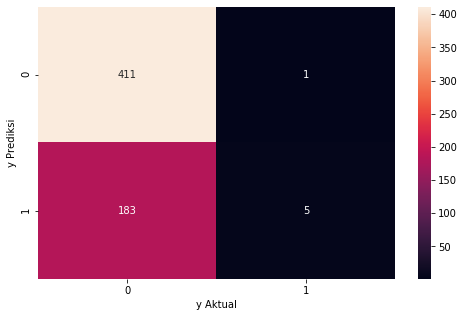

In [139]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.show()

In [140]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       412
           1       0.83      0.03      0.05       188

    accuracy                           0.69       600
   macro avg       0.76      0.51      0.43       600
weighted avg       0.74      0.69      0.58       600



### Random Forest

In [138]:
confusion_matrix(y_test, y_pred_ran)

array([[373,  39],
       [153,  35]], dtype=int64)

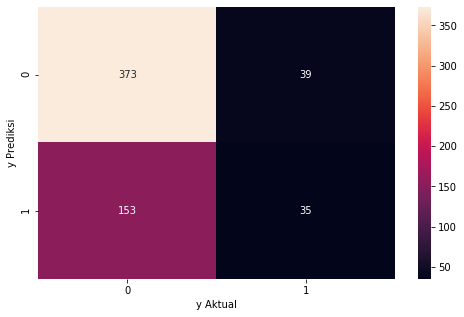

In [141]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_ran), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.show()

In [142]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       412
           1       0.47      0.19      0.27       188

    accuracy                           0.68       600
   macro avg       0.59      0.55      0.53       600
weighted avg       0.64      0.68      0.63       600



dari dua model logistic regression dan random forest menghasil kan nilai recall yang berbeda. logistic regression menghasilkan nilai recall 1 sedangkan random forest menghsilkan recall 0.91 dari dua model tersebut data disimpulkan bahwa model mechine learning yang terbaik adalah logistic regression. 

dari logistic evaluation maetric regression tersebut dapat di tingkatkan False positif yaitu actualnya tidak cancel ternyata prediksinya cancel sehingga dapat meningkankan di sisi perusahaannya  untuk: 
Menghubungi pengunjung terkait kapan perkiraan datang ke hotel,
Membersihkan, merapikan, dan menyiapkan kamar sesuai pesanan pengunjung,
Menyiapkan makanan dan minuman untuk menyambut kedatangan pengunjung,
Menolak pengunjung lain yang memesan kamar yang telah dipesan (booked room), dan
Memberi layanan penjemputan di bandara/stasiun/terminal apabila diperlukan.